# Importing Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# display all columns and rows
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
df = pd.read_csv('loan_data_2007_2014.csv', low_memory=False)
df.sample(5)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
80518,80518,7695109,9397258,17925,17925,17925.0,36 months,10.99,586.76,B,B2,Paralegal,4 years,RENT,110000.0,Verified,Oct-13,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 10/04/13 > I've requested ...,debt_consolidation,FREEDOM,911xx,CA,15.58,0.0,Dec-85,0.0,NaN,NaN,16.0,0.0,36753,66.6,27.0,f,5051.82,5051.82,15835.64000,15835.64,12873.18,2962.46,0.0,0.0,0.0,Jan-16,586.76,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,41967.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55200.0,NaN,NaN,NaN
224497,224497,1171946,1413111,24000,24000,23975.0,36 months,7.90,750.97,A,A4,Boys & Girls Club of Valdosta,2 years,MORTGAGE,68500.0,Verified,Mar-12,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt Consolidation Loan,316xx,GA,22.70,0.0,Nov-95,0.0,NaN,NaN,22.0,0.0,23934,41.4,44.0,f,0.00,0.00,26225.25000,26197.93,24000.00,2225.25,0.0,0.0,0.0,Sep-13,13464.29,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210504,210504,1388496,1634476,11000,11000,11000.0,36 months,16.29,388.31,C,C4,NaN,10+ years,RENT,100000.0,Source Verified,Jul-12,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 06/26/12 > Credit Card ref...,credit_card,Lending,904xx,CA,12.79,0.0,May-99,1.0,NaN,NaN,11.0,0.0,17241,90.7,28.0,f,0.00,0.00,13902.81766,13902.82,11000.00,2902.82,0.0,0.0,0.0,Feb-15,2257.32,NaN,Oct-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74102,74102,7371114,9033063,11450,11450,11450.0,36 months,14.30,393.01,C,C1,NaN,NaN,MORTGAGE,65000.0,Source Verified,Nov-13,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 10/17/13 > I want to pay o...,debt_consolidation,debt con,356xx,AL,8.60,0.0,Jun-75,0.0,NaN,NaN,8.0,0.0,11002,82.7,15.0,w,0.00,0.00,4323.11000,4323.11,2996.52,1326.59,0.0,0.0,0.0,Oct-14,393.01,NaN,Nov-14,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,30.0,11002.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13300.0,NaN,NaN,NaN
404808,404808,13016308,15048510,13000,13000,13000.0,60 months,14.16,303.57,C,C2,Global Sales Training Manager,4 years,MORTGAGE,91000.0,Source Verified,Apr-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,home_improvement,Home improvement,851xx,AZ,8.86,0.0,Nov-10,0.0,NaN,NaN,7.0,0.0,11759,84.2,9.0,w,0.00,0.00,14771.41000,14771.41,13000.00,1771.41,0.0,0.0,0.0,May-15,11432.14,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,242683.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14100.0,NaN,NaN,NaN


# Data Cleaning

In [3]:
# check data type and null value

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

Handle duplicate and missing value

In [4]:
# drop first column since it's an index

df = df.drop(df.columns[0], axis=1)
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# drop column that has 0 non-null values

drop_column = ['annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m',
               'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
               'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi',
               'total_cu_tl', 'inq_last_12m']
df = df.drop(columns=drop_column)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [6]:
# check duplicate

df[df.duplicated(keep=False) == True]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim


In [7]:
# check how many null value in percentage

(df.isna().sum()/df.shape[0]*100)

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
term                            0.000000
int_rate                        0.000000
installment                     0.000000
grade                           0.000000
sub_grade                       0.000000
emp_title                       5.916553
emp_length                      4.505399
home_ownership                  0.000000
annual_inc                      0.000858
verification_status             0.000000
issue_d                         0.000000
loan_status                     0.000000
pymnt_plan                      0.000000
url                             0.000000
desc                           72.981546
purpose                         0.000000
title                           0.004289
zip_code                        0.000000
addr_state                      0.000000
dti             

In [8]:
# drop column that has null values around or above 50%

drop_column_2 = ['desc', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
                'mths_since_last_major_derog']
df = df.drop(columns=drop_column_2)

In [9]:
(df.isna().sum()/df.shape[0]*100)

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      5.916553
emp_length                     4.505399
home_ownership                 0.000000
annual_inc                     0.000858
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
purpose                        0.000000
title                          0.004289
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000
delinq_2yrs                    0.006219


In [10]:
# remove row that has null value around or below 5%

remove_row = ['emp_title', 'emp_length', 'annual_inc', 'title', 'delinq_2yrs', 'earliest_cr_line',
              'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc', 'last_pymnt_d',
              'last_credit_pull_d', 'collections_12_mths_ex_med', 'acc_now_delinq']
df = df.dropna(subset=remove_row)

In [11]:
(df.isna().sum()/df.shape[0]*100)

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      0.000000
emp_length                     0.000000
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
purpose                        0.000000
title                          0.000000
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000
delinq_2yrs                    0.000000


In [12]:
# replace the rest of null value with median

df['tot_coll_amt'].fillna((df['tot_coll_amt'].median()), inplace=True)
df['tot_cur_bal'].fillna((df['tot_cur_bal'].median()), inplace=True)
df['total_rev_hi_lim'].fillna((df['total_rev_hi_lim'].median()), inplace=True)

In [13]:
(df.isna().sum()/df.shape[0]*100)

id                            0.0
member_id                     0.0
loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
term                          0.0
int_rate                      0.0
installment                   0.0
grade                         0.0
sub_grade                     0.0
emp_title                     0.0
emp_length                    0.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
issue_d                       0.0
loan_status                   0.0
pymnt_plan                    0.0
url                           0.0
purpose                       0.0
title                         0.0
zip_code                      0.0
addr_state                    0.0
dti                           0.0
delinq_2yrs                   0.0
earliest_cr_line              0.0
inq_last_6mths                0.0
open_acc                      0.0
pub_rec                       0.0
revol_bal     

In [14]:
# number of rows after handling null values

df.shape[0]

437710

# Data pre-processing

In [15]:
# check the variability of the columns

df.nunique().sort_values()

policy_code                        1
application_type                   1
initial_list_status                2
pymnt_plan                         2
term                               2
verification_status                3
home_ownership                     6
acc_now_delinq                     6
grade                              7
collections_12_mths_ex_med         8
loan_status                        9
emp_length                        11
purpose                           14
delinq_2yrs                       24
pub_rec                           25
inq_last_6mths                    27
sub_grade                         35
addr_state                        50
open_acc                          61
issue_d                           89
last_pymnt_d                      98
last_credit_pull_d               100
total_acc                        112
int_rate                         503
earliest_cr_line                 647
zip_code                         887
revol_util                      1260
l

In [16]:
# remove policy_code and application_type since they only have 1 unique value
# remove member_id, url, and id since every row is unique
# remove emp_title, title and zip_code because they have too many different value
# remove 'sub_grade' column since it is similar to 'grade'
# remove issue_d, last_pymnt_d, pymnt_plan, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_amnt because they are known after the loan is issued

df = df.drop(['policy_code', 'application_type', 'member_id', 'url', 'id', 'emp_title', 'title',
             'zip_code', 'sub_grade', 'issue_d', 'last_pymnt_d', 'pymnt_plan', 'out_prncp',
              'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
              'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
              'last_pymnt_amnt'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 437710 entries, 1 to 466283
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   437710 non-null  int64  
 1   funded_amnt                 437710 non-null  int64  
 2   funded_amnt_inv             437710 non-null  float64
 3   term                        437710 non-null  object 
 4   int_rate                    437710 non-null  float64
 5   installment                 437710 non-null  float64
 6   grade                       437710 non-null  object 
 7   emp_length                  437710 non-null  object 
 8   home_ownership              437710 non-null  object 
 9   annual_inc                  437710 non-null  float64
 10  verification_status         437710 non-null  object 
 11  loan_status                 437710 non-null  object 
 12  purpose                     437710 non-null  object 
 13  addr_state    

<AxesSubplot:>

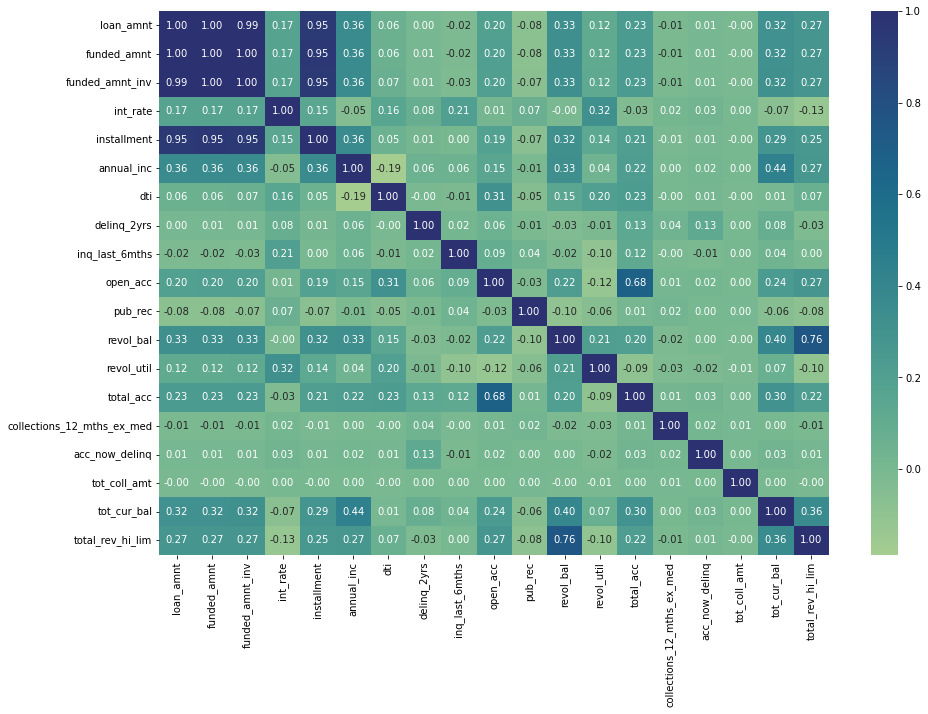

In [17]:
# correlation analysis

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap='crest', annot=True, fmt='.2f')

In [19]:
# remove columns that have correlation near 1 with other variables

df = df.drop(['funded_amnt', 'funded_amnt_inv'], axis = 1)

Numerical data

In [20]:
num_data = df.select_dtypes(include=['float64', 'int64'])
num_data.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,437710.000000,437710.000000,437710.000000,4.377100e+05,437710.000000,437710.000000,437710.000000,437710.000000,437710.000000,4.377100e+05,437710.000000,437710.000000,437710.000000,437710.000000,4.377100e+05,4.377100e+05,4.377100e+05
mean,14442.772726,13.823966,434.982309,7.412616e+04,17.216779,0.287058,0.804076,11.268893,0.153992,1.633232e+04,56.333232,25.163138,0.009072,0.004023,1.608741e+02,1.324751e+05,2.937126e+04
std,8278.528864,4.358294,242.814867,5.517240e+04,7.813353,0.800888,1.089163,4.999563,0.502109,2.049445e+04,23.683636,11.599615,0.108754,0.068933,1.390787e+04,1.421736e+05,3.464404e+04
min,500.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000e+02
25%,8000.000000,10.990000,260.490000,4.550000e+04,11.392500,0.000000,0.000000,8.000000,0.000000,6.503000e+03,39.400000,17.000000,0.000000,0.000000,0.000000e+00,3.473700e+04,1.520000e+04
50%,12375.000000,13.660000,382.990000,6.400000e+04,16.870000,0.000000,0.000000,10.000000,0.000000,1.189300e+04,57.800000,24.000000,0.000000,0.000000,0.000000e+00,8.472850e+04,2.300000e+04
75%,20000.000000,16.490000,569.950000,9.000000e+04,22.750000,0.000000,1.000000,14.000000,0.000000,2.048400e+04,74.900000,32.000000,0.000000,0.000000,0.000000e+00,1.878830e+05,3.450000e+04
max,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,29.000000,32.000000,84.000000,63.000000,2.568995e+06,892.300000,156.000000,20.000000,5.000000,9.152545e+06,8.000078e+06,9.999999e+06


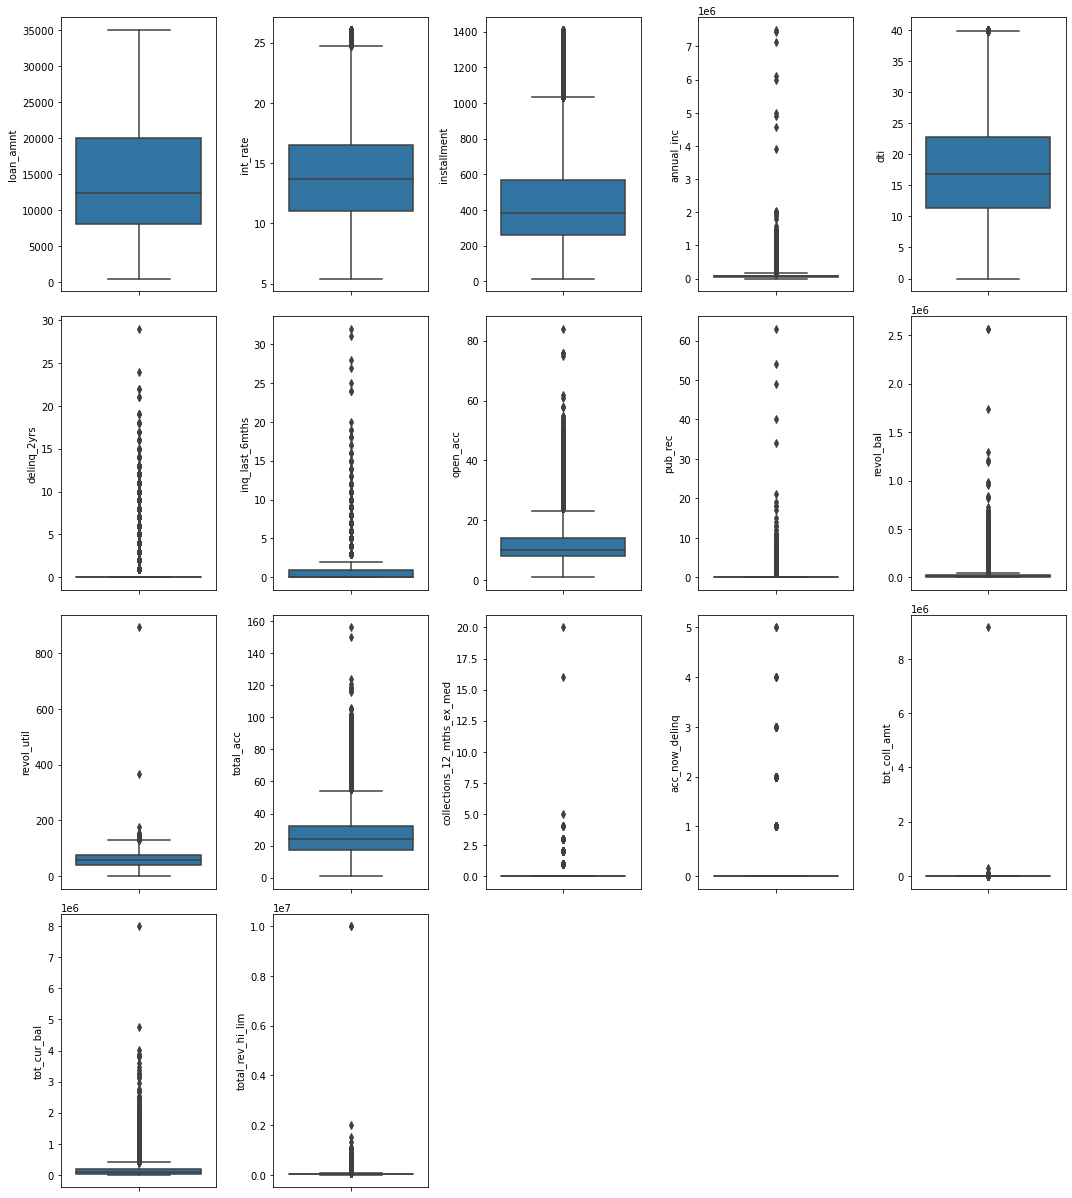

In [24]:
# Boxplot

df_2 = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'collections_12_mths_ex_med',
        'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']

plt.figure(figsize=(15, 25))
for i in range(0, len(df_2)):
    plt.subplot(6, 5, i+1)
    sns.boxplot(y = df[df_2[i]], orient='v')
    plt.tight_layout()

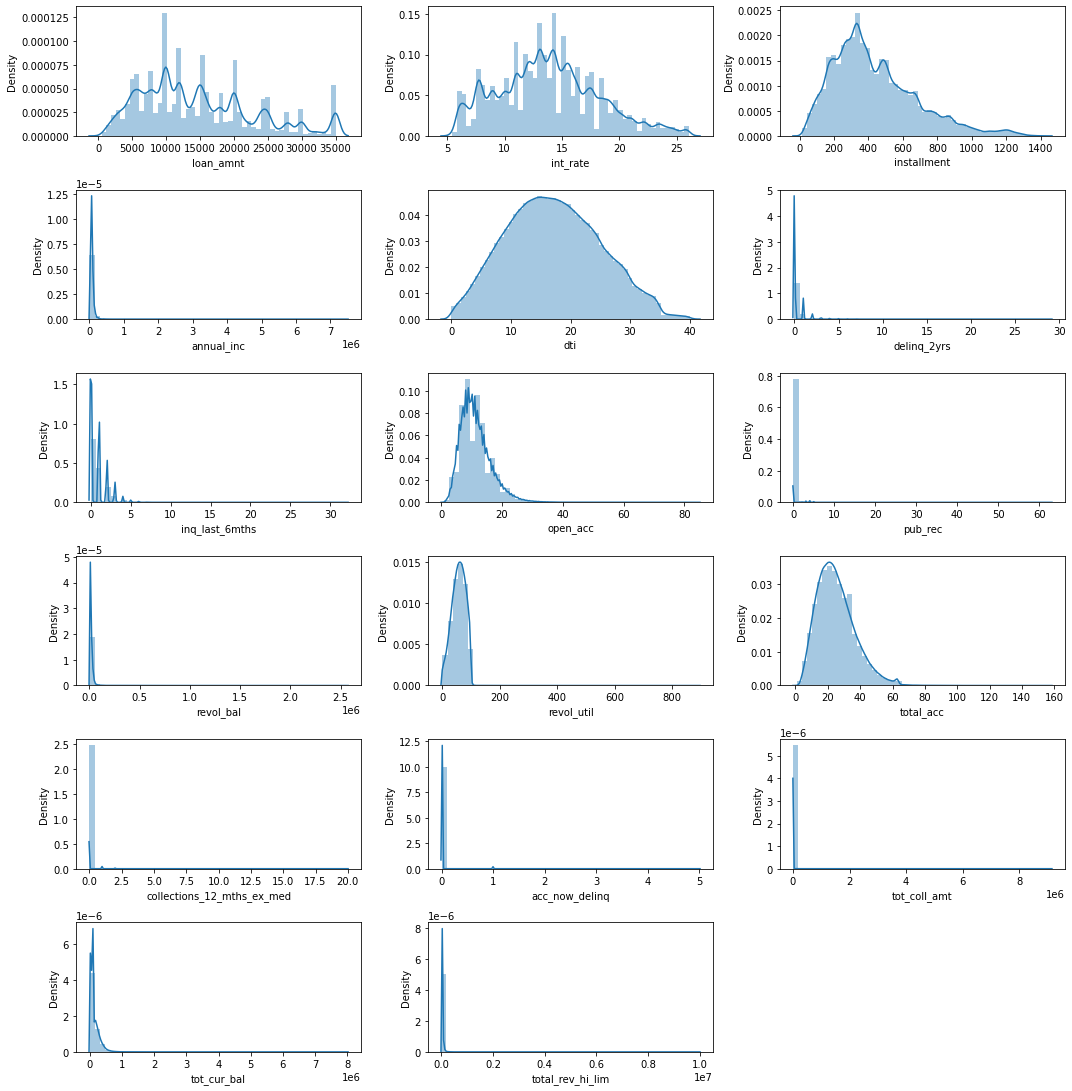

In [25]:
# Distplot

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize=(15, 25))
for i in range(0, len(df_2)):
    plt.subplot(10, 3, i+1) 
    sns.distplot(df[df_2[i]])
    plt.tight_layout()

From the numerical data summary, it is shown that loan amount had a range of 500 and 35,000 with average of 14,442. Meanwhile, loan amount's distribution plot showed a right skewed distribution meaning that the company had more low amount loan rather than high amount loan.

Categorical data

In [26]:
cat_data = df.select_dtypes(include='object')
cat_data.describe()

,term,grade,emp_length,home_ownership,verification_status,loan_status,purpose,addr_state,earliest_cr_line,initial_list_status,last_credit_pull_d
count,437710,437710,437710,437710,437710,437710,437710,437710,437710,437710,437710
unique,2,7,11,6,3,9,14,50,647,2,100
top,36 months,B,10+ years,MORTGAGE,Verified,Current,debt_consolidation,CA,Oct-00,f,Jan-16
freq,314587,128588,147166,222213,148958,210060,259632,67165,3498,283418,308335


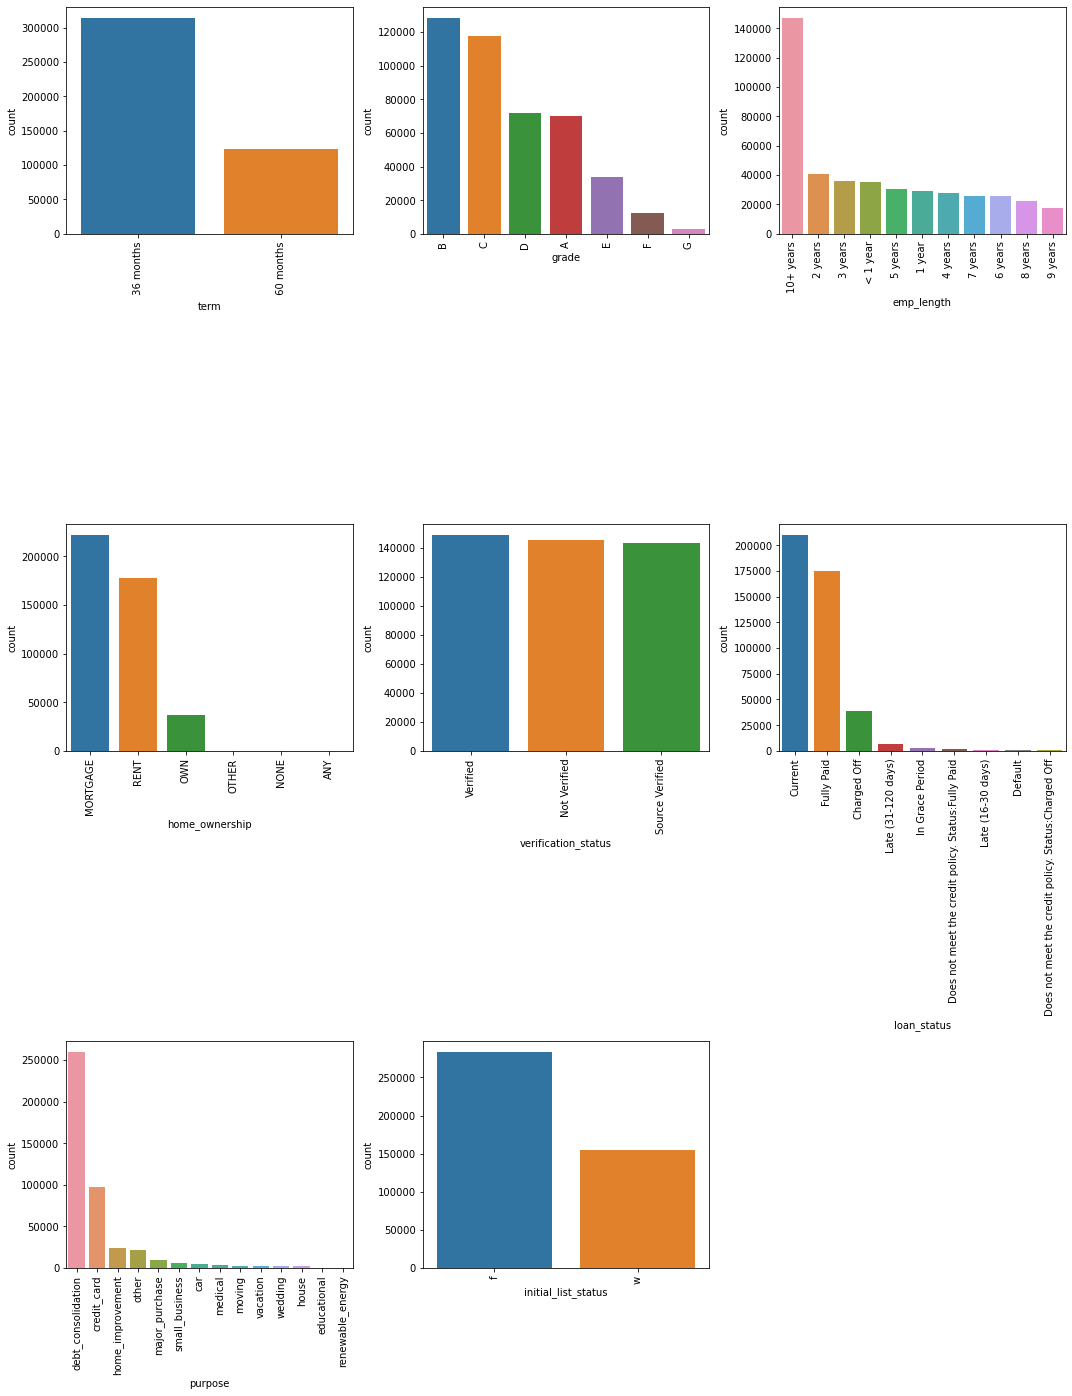

In [27]:
# Countplot

df_3 = ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status',
       'loan_status', 'purpose', 'initial_list_status']

plt.figure(figsize=(15, 25))
for i in range(0, len(df_3)):
    plt.subplot(4, 3, i+1)
    sns.countplot(df[df_3[i]], orient='h', order = df[df_3[i]].value_counts().index)
    plt.xticks(rotation=90)
    plt.tight_layout()

Most of the loan status are current and fully paid, which is great for the company since it is loans that are paid on time.

In [28]:
# change 'term' data type to numeric

df['term'] = pd.to_numeric(df['term'].str.replace(' months', ''))
df['term'].value_counts()

36    314587
60    123123
Name: term, dtype: int64

In [29]:
# change 'grade' to numeric

df['grade'].unique()

array(['C', 'B', 'A', 'E', 'D', 'F', 'G'], dtype=object)

In [30]:
grade_map = {
    'A' : 1,
    'B' : 2,
    'C' : 3,
    'D' : 4,
    'E' : 5,
    'F' : 6,
    'G' : 7,
}

df['grade'] = df['grade'].map(grade_map)
df['grade'].unique()

array([3, 2, 1, 5, 4, 6, 7], dtype=int64)

In [31]:
# change 'emp_length' to numeric

df['emp_length'].unique()

array(['< 1 year', '10+ years', '1 year', '3 years', '8 years', '9 years',
       '5 years', '4 years', '6 years', '2 years', '7 years'],
      dtype=object)

In [32]:
emp_length_map = {
    '< 1 year' : '0',
    '1 year' : '1',
    '2 years' : '2',
    '3 years' : '3',
    '4 years' : '4',
    '5 years' : '5',
    '6 years' : '6',
    '7 years' : '7',
    '8 years' : '8',
    '9 years' : '9',
    '10+ years' : '10'
}

df['emp_length'] = df['emp_length'].map(emp_length_map).fillna('0').astype(int)
df['emp_length'].unique()

array([ 0, 10,  1,  3,  8,  9,  5,  4,  6,  2,  7])

In [33]:
# change categorical data type to numeric with one hot encoding

cat_to_num = ['home_ownership', 'verification_status', 'purpose', 'addr_state', 'initial_list_status']

dummies = pd.get_dummies(df[cat_to_num])
dummies.sample(5)

,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w
394527,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
357721,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
150298,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
388483,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
360093,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [34]:
# drop columns that have been transformed with one hot encoding

df = df.drop(columns=cat_to_num)

# combining one hot encoding columns to df

df = pd.concat([df, dummies], axis = 1)
df.sample(5)

,loan_amnt,term,int_rate,installment,grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w
286693,10000,36,13.35,338.63,3,2,35000.0,Current,16.43,0.0,Jul-94,3.0,8.0,0.0,3662,35.9,13.0,Jan-16,0.0,0.0,0.0,7167.0,10200.0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
130750,18000,36,10.16,582.17,2,10,70000.0,Fully Paid,19.99,0.0,Jul-02,0.0,5.0,0.0,19015,72.6,22.0,Aug-15,0.0,0.0,0.0,206299.0,26200.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
196677,8950,36,8.90,284.20,1,10,65000.0,Fully Paid,19.24,0.0,Oct-94,0.0,10.0,0.0,7523,60.7,22.0,Nov-15,0.0,0.0,0.0,144037.0,12400.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
282296,22000,36,16.29,776.61,4,4,140000.0,Current,16.60,0.0,Dec-02,0.0,21.0,1.0,24534,53.3,35.0,Jan-16,0.0,0.0,0.0,62647.0,46000.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
255388,6000,36,12.39,200.41,3,2,32000.0,Current,28.69,1.0,Sep-05,0.0,10.0,0.0,5600,42.4,20.0,Jan-16,0.0,0.0,0.0,117752.0,13200.0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [35]:
# change earliest_cr_line to datetime

df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format = "%b-%y").dt.year
df['earliest_cr_line'].describe()

count    437710.000000
mean       1997.645123
std           7.363032
min        1969.000000
25%        1994.000000
50%        1999.000000
75%        2002.000000
max        2068.000000
Name: earliest_cr_line, dtype: float64

In [36]:
df['earliest_cr_line'].value_counts().sort_index()

1969      250
1970      271
1971      295
1972      449
1973      493
1974      599
1975      681
1976      947
1977     1263
1978     1588
1979     1710
1980     1699
1981     1930
1982     2680
1983     3614
1984     4409
1985     4794
1986     5487
1987     6395
1988     7543
1989     8969
1990    10184
1991     9609
1992    10442
1993    14575
1994    18409
1995    20292
1996    21672
1997    22138
1998    26465
1999    30833
2000    33831
2001    32648
2002    27710
2003    23867
2004    20315
2005    16541
2006    15402
2007    11849
2008     6928
2009     3570
2010     2643
2011     1027
2044        1
2046        2
2048        1
2049        1
2050        4
2051        2
2053        2
2054        2
2055        2
2056        4
2057        4
2058       10
2059       12
2060       25
2061       11
2062       26
2063       49
2064       55
2065       82
2066      104
2067      155
2068      140
Name: earliest_cr_line, dtype: int64

In [37]:
# there are some error with credit exceeding year 2011, which year below 1969 turn into 20xx

df['earliest_cr_line'] = df['earliest_cr_line'].mask(df['earliest_cr_line'] > 2011,
                                                     df['earliest_cr_line']-100, axis=0)
df['earliest_cr_line'].value_counts().sort_index()

1944        1
1946        2
1948        1
1949        1
1950        4
1951        2
1953        2
1954        2
1955        2
1956        4
1957        4
1958       10
1959       12
1960       25
1961       11
1962       26
1963       49
1964       55
1965       82
1966      104
1967      155
1968      140
1969      250
1970      271
1971      295
1972      449
1973      493
1974      599
1975      681
1976      947
1977     1263
1978     1588
1979     1710
1980     1699
1981     1930
1982     2680
1983     3614
1984     4409
1985     4794
1986     5487
1987     6395
1988     7543
1989     8969
1990    10184
1991     9609
1992    10442
1993    14575
1994    18409
1995    20292
1996    21672
1997    22138
1998    26465
1999    30833
2000    33831
2001    32648
2002    27710
2003    23867
2004    20315
2005    16541
2006    15402
2007    11849
2008     6928
2009     3570
2010     2643
2011     1027
Name: earliest_cr_line, dtype: int64

In [38]:
# change last_credit_pull_d to year, assuming today is 2016

df['last_credit_pull_d'] = 2016 - pd.to_datetime(df['last_credit_pull_d'], format = "%b-%y").dt.year
df['last_credit_pull_d'].describe()

count    437710.000000
mean          0.489077
std           0.950953
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           9.000000
Name: last_credit_pull_d, dtype: float64

Categorizing good / bad loans

In [39]:
df['loan_status'].value_counts()

Current                                                210060
Fully Paid                                             174994
Charged Off                                             38825
Late (31-120 days)                                       6421
In Grace Period                                          3011
Does not meet the credit policy. Status:Fully Paid       1818
Late (16-30 days)                                        1128
Default                                                   776
Does not meet the credit policy. Status:Charged Off       677
Name: loan_status, dtype: int64

In [40]:
good_loans = ['Current', 'Fully Paid', 'In Grace Period',
              'Does not meet the credit policy. Status:Fully Paid']
bad_loans = ['Charged Off', 'Late (31-120 days)', 'Late (16-30 days)', 'Default',
             'Does not meet the credit policy. Status:Charged Off']

# good loan represented as 1 and bad loan represented as 0

df['loan_type_good'] = np.where(df['loan_status'].isin(good_loans), 1, 0)
df['loan_type_good'].value_counts()

1    389883
0     47827
Name: loan_type_good, dtype: int64

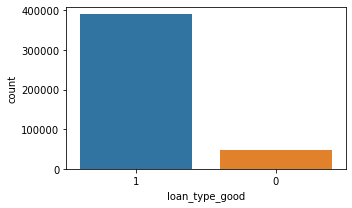

In [41]:
# visualize the proportion of good and loans

plt.figure(figsize=(5, 3))
sns.countplot(df['loan_type_good'], order = df['loan_type_good'].value_counts().index)
plt.tight_layout()

Since we have imbalanced data, we need to perform oversampling in the next step.

In [42]:
# remove loan_status column
df = df.drop(columns='loan_status')

# Splitting Data

In [43]:
x = df.drop('loan_type_good', axis = 1)
y = df['loan_type_good']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42,stratify=y)

Train data: 70%
Test data: 30%

In [44]:
X_train.shape, X_test.shape

((306397, 97), (131313, 97))

# Handle Class Imbalance

In [45]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_train_ro, y_train_ro = ros.fit_resample(X_train, y_train)


print('Before Oversampling:\n{}'.format(y_train.value_counts()))
print('\nAfter Oversampling:\n{}'.format(y_train_ro.value_counts()))

Before Oversampling:
1    272918
0     33479
Name: loan_type_good, dtype: int64

After Oversampling:
1    272918
0    272918
Name: loan_type_good, dtype: int64


Oversampling is needed since bad loan only contributed 10.9% to the overall loan

# Modeling

Since we didn't do any normalization / standardization on the data, we will use non-linear ML model, such as: Decision Tree, Random Forest, XGBoost and AdaBoost

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import classification_report, roc_curve, roc_auc_score, precision_recall_curve

In [47]:
# decision tree

dt_ro = DecisionTreeClassifier(max_depth = 10)
dt_ro.fit(X_train_ro, y_train_ro)

y_pred_dt_ro = dt_ro.predict(X_test)

target_names = ['bad loan', 'good loan']
print('Classification_Report:')
print(classification_report(y_test, y_pred_dt_ro, digits=4, target_names = target_names))

Classification_Report:
              precision    recall  f1-score   support

    bad loan     0.1919    0.6215    0.2932     14348
   good loan     0.9360    0.6789    0.7870    116965

    accuracy                         0.6726    131313
   macro avg     0.5639    0.6502    0.5401    131313
weighted avg     0.8547    0.6726    0.7330    131313



In [48]:
# random forest

rf_ro = RandomForestClassifier(max_depth=10, n_estimators=20)
rf_ro.fit(X_train_ro, y_train_ro)

y_pred_rf_ro = rf_ro.predict(X_test)

target_names = ['bad loan', 'good loan']
print('Classification_Report:')
print(classification_report(y_test, y_pred_rf_ro, digits=4, target_names = target_names))

Classification_Report:
              precision    recall  f1-score   support

    bad loan     0.1873    0.6436    0.2901     14348
   good loan     0.9376    0.6573    0.7728    116965

    accuracy                         0.6558    131313
   macro avg     0.5625    0.6505    0.5315    131313
weighted avg     0.8557    0.6558    0.7201    131313



In [49]:
# xgboost

xgb_ro = XGBClassifier(max_depth=5)
xgb_ro.fit(X_train_ro, y_train_ro)

y_pred_xgb_ro = xgb_ro.predict(X_test)

target_names = ['bad loan', 'good loan']
print('Classification_Report:')
print(classification_report(y_test, y_pred_xgb_ro, digits=4, target_names = target_names))

Classification_Report:
              precision    recall  f1-score   support

    bad loan     0.2057    0.6277    0.3098     14348
   good loan     0.9390    0.7026    0.8038    116965

    accuracy                         0.6944    131313
   macro avg     0.5723    0.6652    0.5568    131313
weighted avg     0.8588    0.6944    0.7498    131313



In [50]:
# adaboost

adb_ro = AdaBoostClassifier(n_estimators = 100)
adb_ro.fit(X_train_ro, y_train_ro)

y_pred_adb_ro = adb_ro.predict(X_test)

target_names = ['bad loan', 'good loan']
print('Classification_Report:')
print(classification_report(y_test, y_pred_adb_ro, digits=4, target_names = target_names))

Classification_Report:
              precision    recall  f1-score   support

    bad loan     0.1851    0.6480    0.2880     14348
   good loan     0.9377    0.6500    0.7678    116965

    accuracy                         0.6498    131313
   macro avg     0.5614    0.6490    0.5279    131313
weighted avg     0.8555    0.6498    0.7154    131313



We will focus on recall since we want to know the percentage of correct predictions relative to the total actual. Since we have imbalanced dataset, we won't use f1 score and accuracy. </br>

The best model is XGBoost: </br>
Recall bad loan: 62.8%, meaning the model correctly identified 62.8% of the total actual bad loan </br>
Recall good loan: 70.3%, meaning the model correctly identified 70.3% of the total actual good loan </br>

In [52]:
# check if the model is over/underfitting using ROC AUC score

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_validate

y_pred = xgb_ro.predict(X_test)
y_pred_train = xgb_ro.predict(X_train_ro)
y_pred_proba = xgb_ro.predict_proba(X_test)
y_pred_proba_train = xgb_ro.predict_proba(X_train_ro)
    
roc_auc_train = round(roc_auc_score(y_train_ro, y_pred_proba_train[:, 1]), 4)
roc_auc_test = round(roc_auc_score(y_test, y_pred_proba[:, 1]), 4)

print("Train ROC AUC:", roc_auc_train)
print("Test ROC AUC:", roc_auc_test)

Train ROC AUC: 0.7813
Test ROC AUC: 0.7308


The difference between train-test results are below 0.1 and above 0.01, meaning the model is not over/underfitting. Hence, there is no need of hyperparameter tuning.

# Feature Importance

In [53]:
xgb_ro.feature_importances_

array([0.01064835, 0.02528635, 0.10785685, 0.0112681 , 0.02729516,
       0.0077273 , 0.02321944, 0.01344447, 0.00827914, 0.0089854 ,
       0.02020523, 0.00789527, 0.00917934, 0.00926181, 0.00853441,
       0.00812644, 0.08931571, 0.00500891, 0.0022735 , 0.00723063,
       0.01741688, 0.01671099, 0.        , 0.00820478, 0.        ,
       0.00251495, 0.00647146, 0.02768462, 0.00592658, 0.00688478,
       0.01151695, 0.00443514, 0.01253919, 0.00699823, 0.00439038,
       0.00507306, 0.00060321, 0.01106529, 0.00603137, 0.00689962,
       0.00612344, 0.007276  , 0.03688274, 0.01061785, 0.00717444,
       0.00552329, 0.00687306, 0.00406078, 0.00761075, 0.00876767,
       0.0100463 , 0.00428855, 0.01297772, 0.0044456 , 0.00989658,
       0.00817223, 0.00804762, 0.        , 0.        , 0.00823982,
       0.00650122, 0.00914716, 0.        , 0.0062247 , 0.00551266,
       0.00903672, 0.        , 0.00832899, 0.00891431, 0.00408447,
       0.00854419, 0.00401997, 0.00825463, 0.0022872 , 0.00784

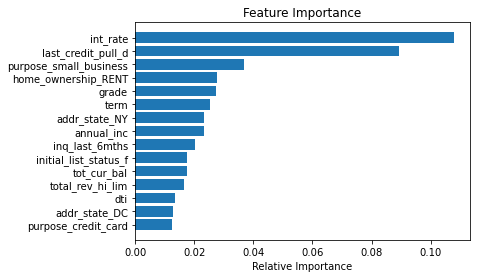

In [54]:
features = x.columns
importances = xgb_ro.feature_importances_
indices = np.argsort(importances)
num_features = 15

plt.title('Feature Importance')
plt.barh(range(num_features), importances[indices[-num_features:]], align='center')
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
plt.xlabel('Relative Importance')
plt.show()